In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [ ]:

data_dir = "./utkface_aligned_cropped/UTKFace"
images = []
ages = []

for file in os.listdir(data_dir):
    if file.endswith(".jpg"):
        age = int(file.split("_")[0])  # Extract age from filename
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  
        images.append(img)
        ages.append(age)


images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
ages = np.array(ages)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1)  
])


/Users/kelanwu/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',  
    metrics=['mae']  
)


In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20,
    verbose=1
)


Epoch 1/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 127s 212ms/step - loss: 453.3307 - mae: 16.2435 - val_loss: 242.8966 - val_mae: 11.4566
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 127s 214ms/step - loss: 205.4616 - mae: 10.7596 - val_loss: 457.5086 - val_mae: 17.0604
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 130s 220ms/step - loss: 158.1227 - mae: 9.3254 - val_loss: 379.3167 - val_mae: 15.5355
Epoch 4/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 132s 223ms/step - loss: 136.2453 - mae: 8.5515 - val_loss: 383.3694 - val_mae: 15.8042
Epoch 5/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 132s 223ms/step - loss: 118.9440 - mae: 8.0207 - val_loss: 408.0471 - val_mae: 16.3463
Epoch 6/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 133s 224ms/step - loss: 105.7844 - mae: 7.6199 - val_loss: 338.3894 - val_mae: 14.9323
Epoch 7/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 133s 225ms/step - loss: 95.5542 - mae: 7.2409 - val_loss: 342.1521 - val_mae: 14.7611
Epoch 8/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 133s 225ms/step - loss: 85.2796 - mae: 6.8515 - val_loss: 375.5159 - v

In [ ]:

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


149/149 - 8s - 57ms/step - loss: 367.7845 - mae: 15.5617
Test Loss (MSE): 367.78448486328125
Test MAE: 15.561653137207031


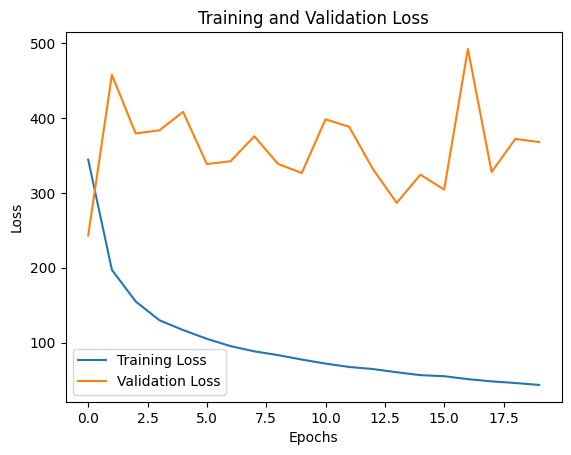

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step


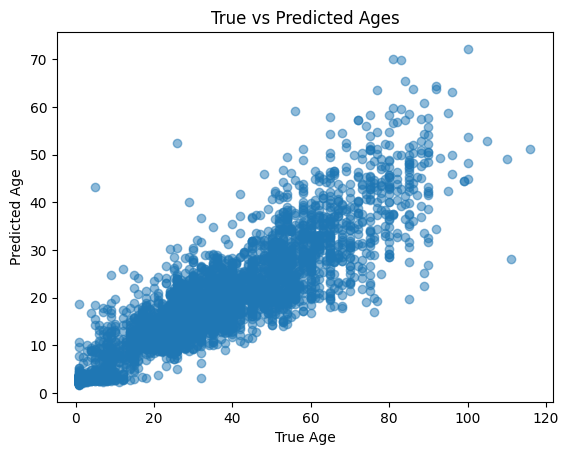

In [10]:
# Predict on the test set
predictions = model.predict(X_test)

# Plot true vs predicted ages
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("True vs Predicted Ages")
plt.show()
